# Wine Quality

Practice example from: https://www.simplilearn.com/tutorials/data-science-tutorial/random-forest-in-r 

# Import and Explore Data

In [1]:
wine <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"), header = TRUE, sep = ";") # This command is used to load the dataset

head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [2]:
t(do.call(cbind, lapply(wine, summary)))

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
fixed.acidity,4.60000,7.1000,7.90000,8.31963727,9.200000,15.90000
volatile.acidity,0.12000,0.3900,0.52000,0.52782051,0.640000,1.58000
citric.acid,0.00000,0.0900,0.26000,0.27097561,0.420000,1.00000
residual.sugar,0.90000,1.9000,2.20000,2.53880550,2.600000,15.50000
chlorides,0.01200,0.0700,0.07900,0.08746654,0.090000,0.61100
free.sulfur.dioxide,1.00000,7.0000,14.00000,15.87492183,21.000000,72.00000
total.sulfur.dioxide,6.00000,22.0000,38.00000,46.46779237,62.000000,289.00000
density,0.99007,0.9956,0.99675,0.99674668,0.997835,1.00369
pH,2.74000,3.2100,3.31000,3.31111320,3.400000,4.01000
sulphates,0.33000,0.5500,0.62000,0.65814884,0.730000,2.00000


## Check Missing Values

In [3]:
cbind(colSums(is.na(wine)))

fixed.acidity,0
volatile.acidity,0
citric.acid,0
residual.sugar,0
chlorides,0
free.sulfur.dioxide,0
total.sulfur.dioxide,0
density,0
pH,0
sulphates,0
alcohol,0


No missing values - good!

## Check Distributions

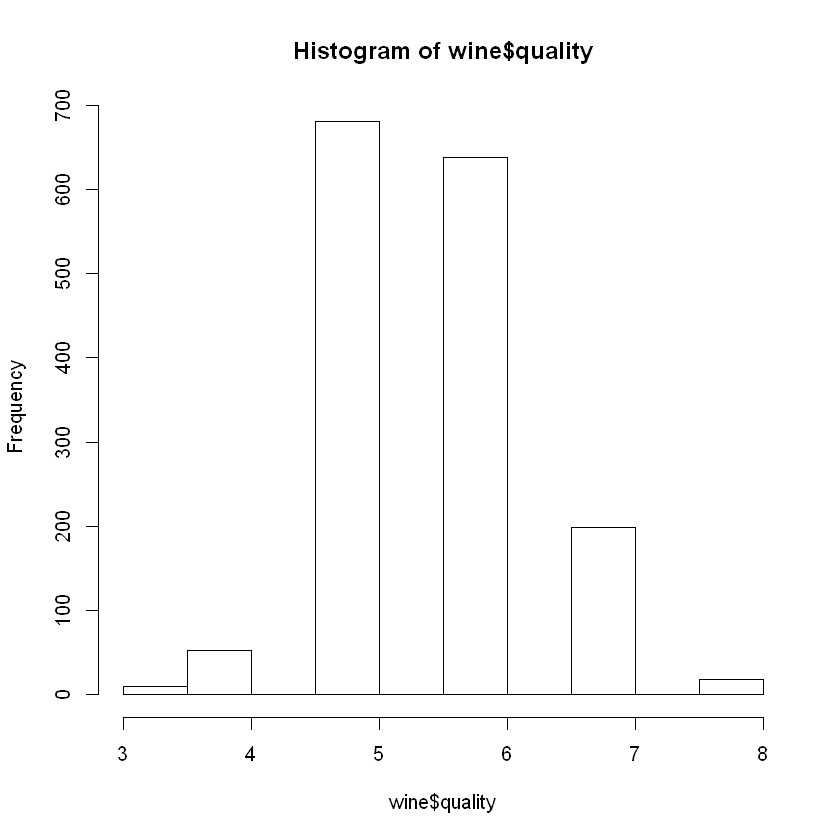

In [4]:
hist(wine$quality)

# Prepare Data for Model
Convert the quality values into factors.

In [14]:
wine$quality <- as.ordered(wine$quality)
class(wine$quality)

[1] "ordered" "factor"

## Split Data Into Training and Testing

In [15]:
set.seed(123)
samp <- sample(nrow(wine), 0.8 * nrow(wine))
train <- wine[samp, ]
test <- wine[-samp, ]

# Build Model

In [16]:
library(randomForest)

model <- randomForest(quality ~ ., data = train, ntree = 1000, mtry = 5)

model

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = quality ~ ., data = train, ntree = 1000,      mtry = 5) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 31.67%
Confusion matrix:
  3 4   5   6  7 8 class.error
3 0 1   7   0  0 0   1.0000000
4 1 0  30  12  1 0   1.0000000
5 0 2 424 102  4 0   0.2030075
6 0 1 111 357 38 0   0.2958580
7 0 0   8  69 93 2   0.4593023
8 0 0   0   9  7 0   1.0000000

## Make Predictions

In [17]:
prediction <- predict(model, newdata = test)

table(prediction, test$quality)

          
prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1   7 116  30   0   0
         6   1   2  30  95  11   1
         7   0   0   3   6  16   0
         8   0   0   0   0   0   1

Calculate model accuracy.

In [20]:
library(caret)

confusionMatrix(prediction, test$quality)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1   7 116  30   0   0
         6   1   2  30  95  11   1
         7   0   0   3   6  16   0
         8   0   0   0   0   0   1

Overall Statistics
                                          
               Accuracy : 0.7125          
                 95% CI : (0.6595, 0.7615)
    No Information Rate : 0.4656          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5129          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity           0.00000  0.00000   0.7785   0.7252  0.59259 0.500000
Specificity           1.00000  1.00000   0.7778   0.7619  0.96928 1.000000
Pos Pred Value            NaN      NaN   0.7532

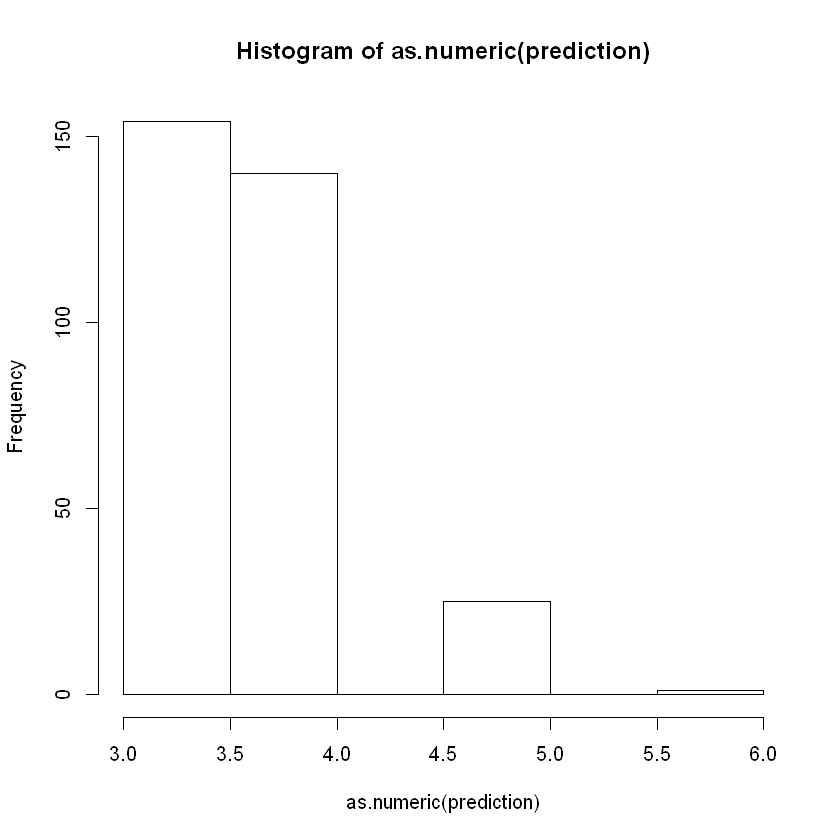

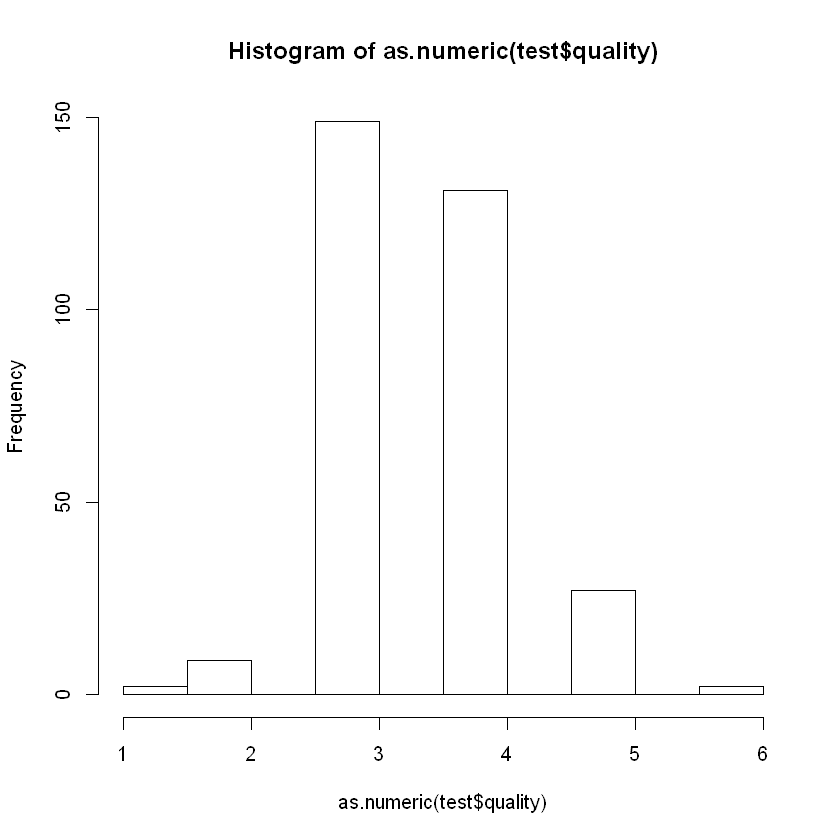

In [27]:
hist(as.numeric(prediction))
hist(as.numeric(test$quality))

In [21]:
summary(train$quality) * 100 / length(train$quality)

3          4          5          6          7          8 
 0.6254887  3.4401876 41.5949961 39.6403440 13.4480063  1.2509773

In [22]:
summary(test$quality) * 100 / length(test$quality)

3       4       5       6       7       8 
 0.6250  2.8125 46.5625 40.9375  8.4375  0.6250

# Conclusion
Overall model performance seems good - accuracy is 90%, but the model does a poor job of correctly classifying 'bad' tasting wine (sensitivity = 9%) and only a moderate job at correctly classifying 'good' wine (sensitivity = 62%). The model seems to be favoring the prediction of 'normal' taste, which is expected since that class is overrepresented. If the model decided to predict all test data as 'normal' it would have an accuracy of 87.5%, only slightly less than the score it actually achieved.

This model would be best suited for predicting which wines have 'normal' taste.

## Reference
True Positive (for Class X): Number of subject which have been correctly classified as class x.  
All Positives (for Class X): Number of subjects actually in class x.  
True Negatives (for Class X): Number of subjects which have been correctly classified as not class x.  
All Negatives (for Class X): Number of subjects actually not in class X.

$$
\text{Sensitivity} = \frac{\text{True Positives}}{\text{All Positives}}
$$
$$
\text{Specificity} = \frac{\text{True Negatives}}{\text{All Negatives}}
$$